In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Series

In [3]:
unit_prices = [500, 200, 100, 2000, 5000]
obj = Series(unit_prices) # initializing a Series from a list
obj

0     500
1     200
2     100
3    2000
4    5000
dtype: int64

In [4]:
obj.values

array([ 500,  200,  100, 2000, 5000])

In [5]:
obj.index

RangeIndex(start=0, stop=5, step=1)

#### Create a series by two lists

In [6]:
part_names = ['Wheels', 'Doors', 'Windows', 'Engine', 'Body']
unit_price_series = Series(unit_prices, index=part_names)
unit_price_series

Wheels      500
Doors       200
Windows     100
Engine     2000
Body       5000
dtype: int64

#### Create a series with dictionary

In [7]:
obj2 = Series({'Wheels':500, 'Doors':200, 'Windows':100, 'Engine':2000, 'Body':5000})
obj2

Body       5000
Doors       200
Engine     2000
Wheels      500
Windows     100
dtype: int64

#### Dictionary-style access to Series

In [8]:
unit_price_series[['Body', 'Doors', 'Windows']]

Body       5000
Doors       200
Windows     100
dtype: int64

In [9]:
'Body' in unit_price_series #look for index

True

#### List-style access

In [10]:
unit_price_series[1]

200

In [11]:
unit_price_series['Wheels':'Windows']

Wheels     500
Doors      200
Windows    100
dtype: int64

#### Difference with Dictionary

In [12]:
labels_copy = ['Wheels'] * 5  # recall: the '*'-operator repeats list items
obj3 = Series(unit_prices, index=labels_copy)
obj3['Wheels']  # Returns a Series; not just one value like for dictionaries!

Wheels     500
Wheels     200
Wheels     100
Wheels    2000
Wheels    5000
dtype: int64

#### Filtering a Series

In [13]:
mask = (unit_price_series < 400) #Mask returns boolean results
unit_price_series[mask]

Doors      200
Windows    100
dtype: int64

In [14]:
num_units_series = Series({'Wheels':4, 'Doors':4, 'Windows':4, 'Engine':1, 'Body':1})
num_units_series

Body       1
Doors      4
Engine     1
Wheels     4
Windows    4
dtype: int64

In [15]:
mask = (num_units_series == 1) 
unit_price_series[mask]

Engine    2000
Body      5000
dtype: int64

#### Operation on Series

In [16]:
import math
unit_price_series * 1.03
unit_price_series.map(math.sqrt) #map for series
print 'Mean =', unit_price_series.mean()  # Average unit price
print 'Variance =', unit_price_series.var() # Variance of unit prices
print 'Max =', unit_price_series.max(), ' for car part =', unit_price_series.idxmax()

Mean = 1560.0
Variance = 4283000.0
Max = 5000  for car part = Body


#### Missing Values

In [17]:
missing_series = unit_price_series[['Engine', 'Transmission', 'Body']]
mask = missing_series.isnull()
missing_series[mask]

Transmission   NaN
dtype: float64

In [18]:
missing_series.dropna()

Engine    2000.0
Body      5000.0
dtype: float64

In [19]:
missing_series.fillna(missing_series.mean())

Engine          2000.0
Transmission    3500.0
Body            5000.0
dtype: float64

## Dataframe

In [162]:
data = {'unit price': [500, 200, 100, 2000, 5000], 'number of units':[4, 4, 4, 1, 1]}
car_table = DataFrame(data, index=part_names)
car_table

,number of units,unit price
Wheels,4,500
Doors,4,200
Windows,4,100
Engine,1,2000
Body,1,5000


#### Accessing elements

In [21]:
car_table['Total unit price'] = car_table['number of units'] * car_table['unit price']
car_table

,number of units,unit price,Total unit price
Wheels,4,500,2000
Doors,4,200,800
Windows,4,100,400
Engine,1,2000,2000
Body,1,5000,5000


In [22]:
#rows NOTE THAT COLUMN ONLY DOES NOT NEED loc
car_table.loc[['Engine', 'Body']]

,number of units,unit price,Total unit price
Engine,1,2000,2000
Body,1,5000,5000


In [23]:
#rows & columns
car_table.loc[['Wheels', 'Doors'], ['Total unit price']]

,Total unit price
Wheels,2000
Doors,800


In [24]:
car_table.iloc[:2, :2]

,number of units,unit price
Wheels,4,500
Doors,4,200


#### Filtering

In [25]:
car_table['car-2 unit price'] = [300, 400, 500, 3000, 4000]
car_table['car-2 Total unit price'] = car_table['car-2 unit price'] * car_table['number of units']
car_table

,number of units,unit price,Total unit price,car-2 unit price,car-2 Total unit price
Wheels,4,500,2000,300,1200
Doors,4,200,800,400,1600
Windows,4,100,400,500,2000
Engine,1,2000,2000,3000,3000
Body,1,5000,5000,4000,4000


In [26]:
mask = (car_table['car-2 unit price'] > car_table['unit price'])
car_table[mask]

,number of units,unit price,Total unit price,car-2 unit price,car-2 Total unit price
Doors,4,200,800,400,1600
Windows,4,100,400,500,2000
Engine,1,2000,2000,3000,3000


#### Transpose

In [27]:
car_table.T

,Wheels,Doors,Windows,Engine,Body
number of units,4,4,4,1,1
unit price,500,200,100,2000,5000
Total unit price,2000,800,400,2000,5000
car-2 unit price,300,400,500,3000,4000
car-2 Total unit price,1200,1600,2000,3000,4000


#### Reading from CSV files

In [28]:
df = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/CarParts.csv')
df

,Part name,Number of units,Price per unit,Total price
0,Wheels,4,500,2000
1,Doors,4,200,800
2,Windows,4,100,400
3,Engine,1,2000,2000
4,Body,1,5000,5000


In [29]:
df.set_index('Part name', inplace=True)
print df.index.values #important

['Wheels' 'Doors' 'Windows' 'Engine' 'Body']


#### Operations on a DataFrame

In [30]:
def get_column_range(x):
    return x.max() - x.min()

# "Apply" to each column of the DataFrame
df.apply(get_column_range)

Number of units       3
Price per unit     4900
Total price        4600
dtype: int64

In [31]:
df.sort_index()

,Number of units,Price per unit,Total price
Part name,,,
Body,1,5000,5000
Doors,4,200,800
Engine,1,2000,2000
Wheels,4,500,2000
Windows,4,100,400


In [32]:
df.sort_values(by='Price per unit')

,Number of units,Price per unit,Total price
Part name,,,
Windows,4,100,400
Doors,4,200,800
Wheels,4,500,2000
Engine,1,2000,2000
Body,1,5000,5000


## Example

In [33]:
orig_data = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/311_calls_2months.csv',
                        nrows=100000,
                        dtype=unicode,
                        parse_dates=['Created Date'])

In [34]:
vc = orig_data['Complaint Type'].value_counts()
vc[:10]

HEAT/HOT WATER            20286
Blocked Driveway           5760
Street Light Condition     5288
Street Condition           4495
Illegal Parking            4045
UNSANITARY CONDITION       3855
PAINT/PLASTER              3384
PLUMBING                   2846
Noise - Commercial         2542
Opinion for the Mayor      2373
Name: Complaint Type, dtype: int64

In [35]:
vc[-10:]

Standpipe - Mechanical               1
Window Guard                         1
Transportation Provider Complaint    1
Illegal Fireworks                    1
DHS Income Savings Requirement       1
Rangehood                            1
Ferry Permit                         1
Squeegee                             1
Tanning                              1
Invitation                           1
Name: Complaint Type, dtype: int64

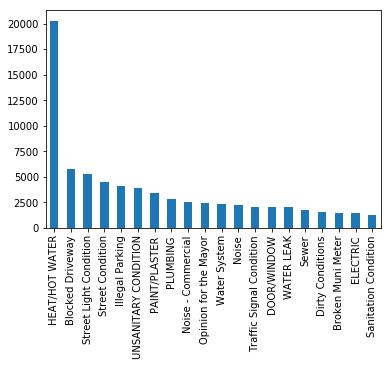

In [36]:
top_20_vc = vc[:20]
top_20_vc.plot(kind='bar')

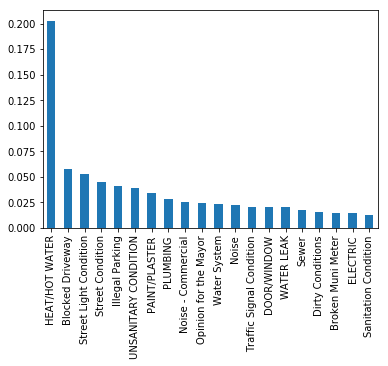

In [37]:
top_20_vc_fraction = top_20_vc / vc.sum()
top_20_vc_fraction.plot(kind='bar')

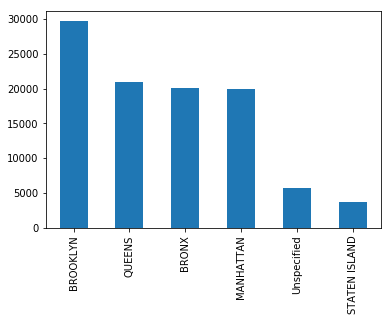

In [38]:
orig_data['Borough'].value_counts().plot(kind='bar')

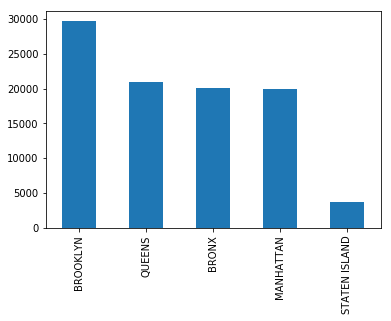

In [39]:
mask = (orig_data['Borough'] == 'Unspecified')
orig_data.loc[mask, 'Borough'] = np.nan # This sets the value to NaN

# Let's redo the bar plot
orig_data['Borough'].value_counts().plot(kind='bar')

In [40]:
borough_zip = orig_data[['Borough', 'Incident Zip']]
borough_zip[:5]

,Borough,Incident Zip
0,NaN,NaN
1,QUEENS,11372
2,QUEENS,11416
3,BROOKLYN,11233
4,MANHATTAN,10022


#### Drop NA

In [41]:
mask_borough = borough_zip['Borough'].notnull()
mask_zip = borough_zip['Incident Zip'].notnull()
mask = (mask_borough & mask_zip) 
borough_zip_clean = borough_zip[mask]
borough_zip_clean[:5]

,Borough,Incident Zip
1,QUEENS,11372
2,QUEENS,11416
3,BROOKLYN,11233
4,MANHATTAN,10022
5,QUEENS,11368


In [42]:
#Use this!!!!!!!!
borough_zip_clean = borough_zip.dropna(how='any')
borough_zip_clean[:5]

,Borough,Incident Zip
1,QUEENS,11372
2,QUEENS,11416
3,BROOKLYN,11233
4,MANHATTAN,10022
5,QUEENS,11368


#### Drop Duplicates

In [43]:
borough_zip_dedup = borough_zip_clean.drop_duplicates(subset='Incident Zip')
borough_zip_dedup[:5]

,Borough,Incident Zip
1,QUEENS,11372
2,QUEENS,11416
3,BROOKLYN,11233
4,MANHATTAN,10022
5,QUEENS,11368


In [44]:
tmp_df = borough_zip_dedup.set_index('Incident Zip')
borough_zip_series = tmp_df['Borough']
borough_zip_series[:5]

Incident Zip
11372       QUEENS
11416       QUEENS
11233     BROOKLYN
10022    MANHATTAN
11368       QUEENS
Name: Borough, dtype: object

#### Rename a series

In [45]:
vc = orig_data['Incident Zip'].value_counts()
vc_renamed = vc.rename(borough_zip_series)
vc_renamed[:5]

BROOKLYN    1758
BRONX       1632
BRONX       1554
BRONX       1373
BRONX       1372
Name: Incident Zip, dtype: int64

In [46]:
zip_per_borough = orig_data[['Borough', 'Incident Zip']].dropna(how='any') \
                                                        .drop_duplicates() \
                                                        ['Borough'] \
                                                        .value_counts()
zip_per_borough

QUEENS           65
MANHATTAN        58
BROOKLYN         40
BRONX            26
STATEN ISLAND    12
Name: Borough, dtype: int64

In [47]:
import re
def noisy(s):
    """Given a Complaint Type string, return True if it is
       a noise-related complaint."""
    return (len(re.findall('Noise', s)) > 0)
print noisy('Noise - Commercial')
print noisy('ELEVATOR')

True
False


In [48]:
noise_mask = orig_data['Complaint Type'].map(noisy)
noise_complaints = orig_data[noise_mask]
noise_complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
1,29636054,2015-01-06 02:09:30,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,70-06 ROOSEVELT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74642854264474,-73.89533997952648,"(40.74642854264474, -73.89533997952648)"
4,29641040,2015-01-06 02:03:11,01/06/2015 02:36:38 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10022,238 EAST 58 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.76049674396275,-73.96604690111288,"(40.76049674396275, -73.96604690111288)"
20,29639511,2015-01-06 01:32:51,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,70-06 ROOSEVELT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74642854264474,-73.89533997952648,"(40.74642854264474, -73.89533997952648)"
24,29641827,2015-01-06 01:27:24,NaN,EDC,Economic Development Corporation,Noise - Helicopter,Other,Above Address,10040,89 THAYER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.864212983761796,-73.92753738525039,"(40.864212983761796, -73.92753738525039)"
27,29638620,2015-01-06 01:24:16,01/06/2015 02:19:00 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10011,355 WEST 16 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74173312459783,-74.00308183921501,"(40.74173312459783, -74.00308183921501)"


## Merging DataFrames

In [49]:
askers = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/PandasUsers.csv')
questions = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/PandasPosts.csv')
helpers = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/PandasAnswerers.csv')
answers = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/PandasAnswers.csv')

In [50]:
askers.columns.values

array(['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate',
       'WebsiteUrl', 'Location', 'AboutMe', 'Views', 'UpVotes',
       'DownVotes', 'EmailHash', 'Age'], dtype=object)

In [51]:
asker_id = askers.iloc[0]['Id']
asker_id

1843099

In [52]:
questions_by_this_person = questions[questions['OwnerUserId'] == asker_id]
questions_by_this_person[['CreationDate', 'Body']]

,CreationDate,Body
65,2012-12-03 15:51:59,I have the following data:\n\nStart Time=2012-...
70,2012-12-06 04:29:37,I try to read-in a file by pandas like this:\n...
79,2012-12-12 04:44:03,I read-in a file and plot it with pandas DataF...
96,2012-12-14 20:47:09,after plotting a figure I get a figure legend ...
106,2012-12-14 04:13:35,I have a temperature file with many years temp...
294,2013-01-24 23:51:14,I have a data file that includes several years...
332,2013-01-28 20:14:49,I have a DataFrame 'tso':\n\ntso=DataFrame(tem...


In [53]:
def is_reputed_asker(x):
    """Find all reputed asker IDs, and then check if x is among those IDs"""
    reputed_askers = askers[askers['Reputation'] >= 1000]
    ids_of_all_reputed_askers = reputed_askers['Id'].values
    return (x in ids_of_all_reputed_askers)

mask_questions_by_reputed_askers = questions['OwnerUserId'].map(is_reputed_asker)
questions[mask_questions_by_reputed_askers][:3]

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
30,13457335,1,NaN,2012-11-19 15:50:40,0,58,After seeing this question about replicating S...,567620,NaN,NaN,NaN,2012-11-19 16:01:45,Python Pandas: What causes slowdown in differe...,<python><benchmarking><pandas><apply>,1.0,NaN,NaN,NaN
42,13675749,1,13708892.0,2012-12-03 00:58:53,2,147,I have inhomogeneous ~secondly data with a tim...,128508,NaN,1452002.0,2012-12-04 11:06:21,2012-12-04 17:50:04,Resample Searies/DataFrame with frequency anch...,<pandas>,1.0,2.0,NaN,NaN
51,13740672,1,13741439.0,2012-12-06 09:36:35,0,64,I'd like to filter out weekend data and only l...,24718,NaN,NaN,NaN,2012-12-06 10:19:32,in pandas how can I groupby weekday() for a da...,<python><pandas>,1.0,1.0,1.0,NaN


#### Merging

In [54]:
questions_askers = questions.merge(askers,
                                   left_on='OwnerUserId',
                                   right_on='Id',
                                   suffixes=['_question', '_asker'])

#### Reshaping data

In [55]:
complaints = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/311-requests-pivot.csv')
complaints.columns.values

array(['Complaint Type', 'Borough', 'Status', 'Agency', 'count'], dtype=object)

In [56]:
complaints[:10]

,Complaint Type,Borough,Status,Agency,count
0,Collection Truck Noise,BROOKLYN,Closed,DSNY,6
1,Collection Truck Noise,MANHATTAN,Closed,DSNY,5
2,Collection Truck Noise,QUEENS,Closed,DSNY,4
3,Collection Truck Noise,STATEN ISLAND,Closed,DSNY,1
4,Noise,BRONX,Closed,DEP,40
5,Noise,BRONX,Open,DEP,75
6,Noise,BROOKLYN,Closed,DEP,85
7,Noise,BROOKLYN,Open,DEP,442
8,Noise,BROOKLYN,Started,DEP,9
9,Noise,MANHATTAN,Closed,DEP,131


In [57]:
pivoted = pd.pivot_table(complaints,
                         index='Complaint Type',
                         columns='Borough',
                         values='count',
                         aggfunc=sum)
pivoted

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
Complaint Type,,,,,
Collection Truck Noise,NaN,6.0,5.0,4.0,1.0
Noise,115.0,536.0,1061.0,400.0,72.0
Noise - Commercial,163.0,698.0,1223.0,406.0,42.0
Noise - Helicopter,NaN,21.0,63.0,9.0,NaN
Noise - House of Worship,1.0,24.0,3.0,7.0,NaN
Noise - Park,2.0,NaN,17.0,11.0,NaN
Noise - Street/Sidewalk,109.0,208.0,609.0,100.0,19.0
Noise - Vehicle,53.0,183.0,228.0,75.0,18.0


In [58]:
pivot_all = pd.pivot_table(complaints,
                           index=['Complaint Type', 'Borough'],
                           columns=['Agency', 'Status'],
                           values='count',
                           fill_value=0)  # fill in missing values
pivot_all[:7]

Agency                                  DEP                DSNY  EDC     NYPD  \
Status                               Closed Open Started Closed Open Assigned   
Complaint Type         Borough                                                  
Collection Truck Noise BROOKLYN           0    0       0      6    0        0   
                       MANHATTAN          0    0       0      5    0        0   
                       QUEENS             0    0       0      4    0        0   
                       STATEN ISLAND      0    0       0      1    0        0   
Noise                  BRONX             40   75       0      0    0        0   
                       BROOKLYN          85  442       9      0    0        0   
                       MANHATTAN        131  928       2      0    0        0   

Agency                                            
Status                               Closed Open  
Complaint Type         Borough                    
Collection Truck Noise BROOKLYN           0    0  
                       MANHATTAN          0    0  
                       QUEENS             0    0  
                       STATEN ISLAND      0    0  
Noise                  BRONX              0    0  
                       BROOKLYN           0    0  
                       MANHATTAN          0    0

#### max values and labels

In [59]:
complaint_agency = pd.pivot_table(complaints,
                                  index='Complaint Type',
                                  columns='Agency',
                                  values='count',
                                  aggfunc=sum,
                                  fill_value=0)
complaint_agency # Oops

Agency,DEP,DSNY,EDC,NYPD
Complaint Type,,,,
Collection Truck Noise,0,16,0,0
Noise,2184,0,0,0
Noise - Commercial,0,0,0,2532
Noise - Helicopter,0,0,93,0
Noise - House of Worship,0,0,0,35
Noise - Park,0,0,0,30
Noise - Street/Sidewalk,0,0,0,1045
Noise - Vehicle,0,0,0,557


In [60]:
complaint_agency.idxmax()  # Oops

Agency
DEP                      Noise
DSNY    Collection Truck Noise
EDC         Noise - Helicopter
NYPD        Noise - Commercial
dtype: object

In [61]:
complaint_agency.T.idxmax()

Complaint Type
Collection Truck Noise      DSNY
Noise                        DEP
Noise - Commercial          NYPD
Noise - Helicopter           EDC
Noise - House of Worship    NYPD
Noise - Park                NYPD
Noise - Street/Sidewalk     NYPD
Noise - Vehicle             NYPD
dtype: object

#### Rank

In [62]:
# rank users via rank()
reputation_rank = askers['Reputation'].rank(ascending=False)
print reputation_rank[:5]

0    193.0
1     72.0
2    102.0
3    148.0
4    405.5
Name: Reputation, dtype: float64


#### Percentile

In [63]:
#percentile
reputation_percentile = pd.qcut(reputation_rank,
                                10,
                                labels=['0-10', '10-20', '20-30',
                                        '30-40', '40-50', '50-60',
                                        '60-70', '70-80', '80-90', '90-100'])
reputation_percentile[:5]

0    30-40
1    10-20
2    20-30
3    30-40
4    80-90
Name: Reputation, dtype: category
Categories (10, object): [0-10 < 10-20 < 20-30 < 30-40 ... 60-70 < 70-80 < 80-90 < 90-100]

In [64]:
# Add this as a new column to askers
askers['Reputation Percentile'] = reputation_percentile

In [65]:
askers[['Reputation', 'Reputation Percentile']][:5]

,Reputation,Reputation Percentile
0,100,30-40
1,766,10-20
2,472,20-30
3,188,30-40
4,13,80-90


In [66]:
questions_askers = questions.merge(askers,
                                   left_on='OwnerUserId',
                                   right_on='Id',
                                   suffixes=['_question', '_asker'])

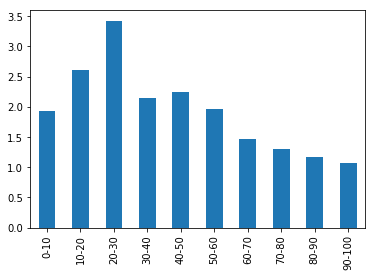

In [67]:
# Step 3: Get number of questions by Reputation Percentile.
askers_by_percentile = askers['Reputation Percentile'].value_counts()
questions_by_percentile = questions_askers['Reputation Percentile'].value_counts()
questions_per_asker_percentiles = questions_by_percentile / askers_by_percentile
questions_per_asker_percentiles.plot(kind='bar')

In [68]:
# Rank the questions by ViewCount
count_ranks = questions['ViewCount'].rank(ascending=False)
# Make a mask of the top 10 ranks
mask = (count_ranks <= 10)
# Display the questions
questions[mask][['Title', 'ViewCount']]

,Title,ViewCount
339,Sort a pandas DataMatrix in ascending order,2484
347,append two data frame with pandas,2913
348,What is the most efficient way to loop through...,4228
354,Tutorial on PANDAS and PYTABLES,6454
367,How to get the correlation between two timeser...,2035
400,Add indexed column to DataFrame with pandas,2624
460,iterating row by row through a pandas dataframe,2052
463,add one row in a pandas.DataFrame,3238
516,Renaming columns in pandas,2422
723,How to fix Python Numpy/Pandas installation?,2066


In [69]:
questions.sort_values(by='ViewCount', ascending=False)[:10][['Title', 'ViewCount']]

,Title,ViewCount
354,Tutorial on PANDAS and PYTABLES,6454
348,What is the most efficient way to loop through...,4228
463,add one row in a pandas.DataFrame,3238
347,append two data frame with pandas,2913
400,Add indexed column to DataFrame with pandas,2624
339,Sort a pandas DataMatrix in ascending order,2484
516,Renaming columns in pandas,2422
723,How to fix Python Numpy/Pandas installation?,2066
460,iterating row by row through a pandas dataframe,2052
367,How to get the correlation between two timeser...,2035


#### Stack and unstack

In [70]:
stacked = pivoted.stack()
stacked[:10]

Complaint Type          Borough      
Collection Truck Noise  BROOKLYN            6.0
                        MANHATTAN           5.0
                        QUEENS              4.0
                        STATEN ISLAND       1.0
Noise                   BRONX             115.0
                        BROOKLYN          536.0
                        MANHATTAN        1061.0
                        QUEENS            400.0
                        STATEN ISLAND      72.0
Noise - Commercial      BRONX             163.0
dtype: float64

In [71]:
stacked.unstack('Borough')[:3]

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
Complaint Type,,,,,
Collection Truck Noise,NaN,6.0,5.0,4.0,1.0
Noise,115.0,536.0,1061.0,400.0,72.0
Noise - Commercial,163.0,698.0,1223.0,406.0,42.0


In [72]:
stacked.unstack('Complaint Type')[:3]

Complaint Type,Collection Truck Noise,Noise,Noise - Commercial,Noise - Helicopter,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle
Borough,,,,,,,,
BRONX,NaN,115.0,163.0,NaN,1.0,2.0,109.0,53.0
BROOKLYN,6.0,536.0,698.0,21.0,24.0,NaN,208.0,183.0
MANHATTAN,5.0,1061.0,1223.0,63.0,3.0,17.0,609.0,228.0


In [73]:
# How do we get both together?
most_common = DataFrame({'Most common complaint':pivoted.idxmax(), 'Num complaints':pivoted.max()})
most_common

,Most common complaint,Num complaints
Borough,,
BRONX,Noise - Commercial,163.0
BROOKLYN,Noise - Commercial,698.0
MANHATTAN,Noise - Commercial,1223.0
QUEENS,Noise - Commercial,406.0
STATEN ISLAND,Noise,72.0


## Visualization

In [74]:
cars = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/cars.csv').dropna()
cars[:5]

,type,mpg,cyl,disp,hp,wt,speed,wt.1
0,AMC Ambassador Brougham,13.0,8,360.0,175.0,3821,11.0,73
1,AMC Ambassador DPL,15.0,8,390.0,190.0,3850,8.5,70
2,AMC Ambassador SST,17.0,8,304.0,150.0,3672,11.5,72
3,AMC Concord DL 6,20.2,6,232.0,90.0,3265,18.2,79
4,AMC Concord DL,18.1,6,258.0,120.0,3410,15.1,78


#### Scatter Plot

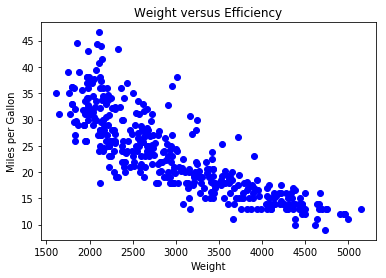

In [75]:
x, marker='o', color='blue', linestyle='None')
xlabel('Weight')
ylabel('Miles per Gallon')
title('Weight versus Efficiency')
show()

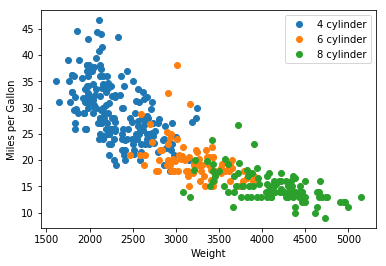

In [76]:
c4 = cars[cars['cyl'] == 4]
c6 = cars[cars['cyl'] == 6]
c8 = cars[cars['cyl'] == 8]
plot(c4['wt'], c4['mpg'], marker='o', linestyle='None', label='4 cylinder')
plot(c6['wt'], c6['mpg'], marker='o', linestyle='None', label='6 cylinder')
plot(c8['wt'], c8['mpg'], marker='o', linestyle='None', label='8 cylinder')
xlabel('Weight')
ylabel('Miles per Gallon')
legend(numpoints=1, loc='best')
show()

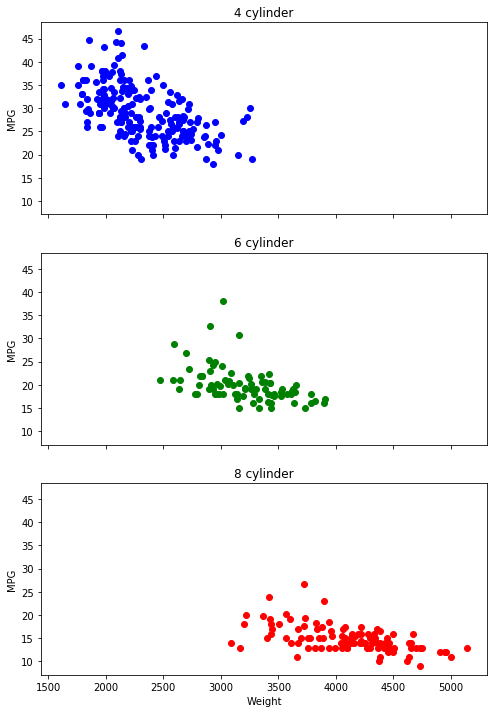

In [77]:
# First, create a blank figure and "axis" objects
fig, (ax1, ax2, ax3) = subplots(nrows=3,
                                ncols=1,
                                sharex=True,
                                sharey=True,
                                figsize=(8, 12))

# Each "axis" object corresponds to one subplot
# Fill in the subplots.
ax1.plot(c4['wt'], c4['mpg'], marker='o', color='blue', linestyle='None')
ax1.set_title('4 cylinder')
ax1.set_ylabel('MPG')

ax2.plot(c6['wt'], c6['mpg'], marker='o', color='green', linestyle='None')
ax2.set_title('6 cylinder')
ax2.set_ylabel('MPG')

ax3.plot(c8['wt'], c8['mpg'], marker='o', color='red', linestyle='None')
ax3.set_title('8 cylinder')
ax3.set_ylabel('MPG')
ax3.set_xlabel('Weight')

show()

#### Line Plot

In [78]:
# This dataset contains the number of births of boys and girls
# from 1880-2008
births = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/births.csv')
births[:5]

,year,F,M
0,1880,90994.0,110492.0
1,1881,91955.0,100747.0
2,1882,107851.0,113687.0
3,1883,112322.0,104631.0
4,1884,129022.0,114445.0


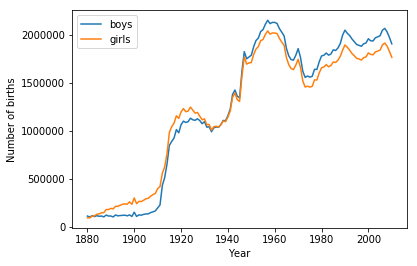

In [79]:
plot(births['year'], births['M'], marker='None', linestyle='-', label='boys')
plot(births['year'], births['F'], marker='None', linestyle='-', label='girls')
xlabel('Year')
ylabel('Number of births')
legend(loc='best')
show()

In [80]:
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('mpg ~ wt', cars, return_type='dataframe')
result = sm.OLS(y, X).fit()

slope = result.params['wt']
intercept = result.params['Intercept']
print 'mpg = {:.4f} + {:.4f} * wt'.format(intercept, slope)

mpg = 46.2165 + -0.0076 * wt


/usr/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [81]:
predicted = cars['wt'] * slope + intercept
regression_predictions = Series(predicted.values,
                                index=cars['wt'])
regression_predictions[:5]

wt
3821    16.996029
3850    16.774256
3672    18.135483
3265    21.247951
3410    20.139087
dtype: float64

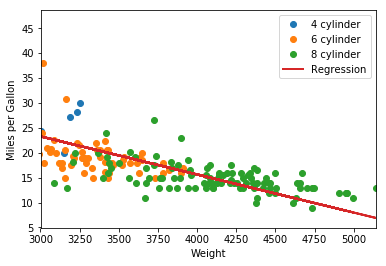

In [82]:
plot(c4['wt'], c4['mpg'], marker='o', linestyle='None', label='4 cylinder')
plot(c6['wt'], c6['mpg'], marker='o', linestyle='None', label='6 cylinder')
plot(c8['wt'], c8['mpg'], marker='o', linestyle='None', label='8 cylinder')

# New plot command for the regression predictions
regression_predictions.plot(label='Regression', linewidth=2)

xlabel('Weight')
ylabel('Miles per Gallon')
legend(numpoints=1, loc='best')
show()

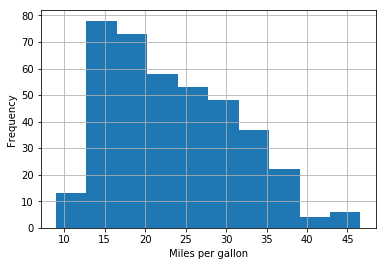

In [83]:
cars['mpg'].hist()
xlabel('Miles per gallon')
ylabel('Frequency')

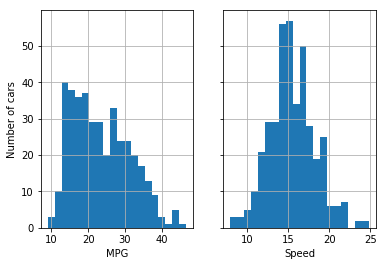

In [84]:
fig, (ax1, ax2) = subplots(nrows=1,
                           ncols=2,
                           sharey=True,
                           figsize=(6, 4))

# Plot the MPG histogram on the first subplot
cars['mpg'].hist(ax=ax1, bins=20)
ax1.set_xlabel('MPG')
ax1.set_ylabel('Number of cars')

# Plot the speed histogram on the second subplot
cars['speed'].hist(ax=ax2, bins=20)
ax2.set_xlabel('Speed')

(-1.1055161340232746,
 1.1002626730487273,
 -1.1100634242242517,
 1.103534683151302)

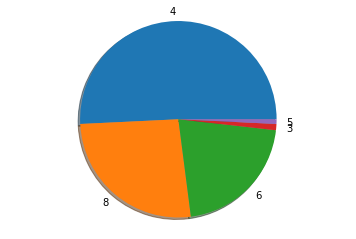

In [85]:
cylinder_counts = cars['cyl'].value_counts()
cylinder_percentages = cylinder_counts * 100.0 / sum(cylinder_counts)
pie(cylinder_percentages.values,
    labels=cylinder_percentages.index.values,
    shadow=True)
axis('equal')

In [86]:
names = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/baby-names-top1000.csv')

In [87]:
boy_names = names[names['sex'] == 'boy']
year_name_pivot = pd.pivot_table(boy_names,
                                 index='year',
                                 columns='name',
                                 values='percent')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x117b07e50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1131c3090>], dtype=object)

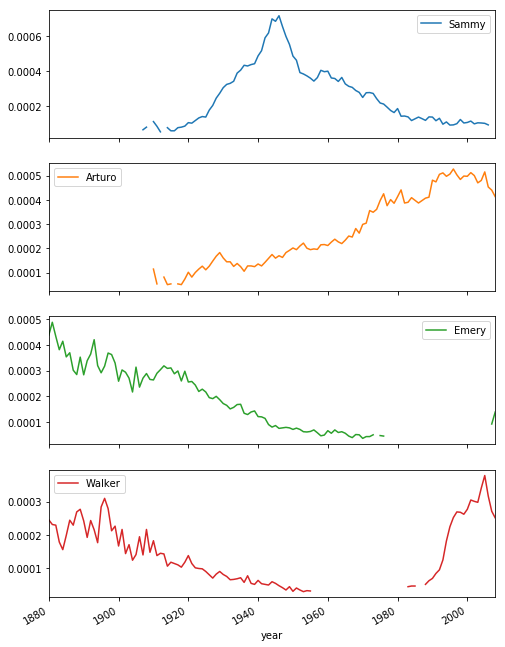

In [88]:
year_name_pivot[['Sammy', 'Arturo', 'Emery', 'Walker']].plot(subplots=True, figsize=(8, 12))

## GroupBy

In [89]:
cylinder_speed_pivot = pd.pivot_table(cars, 
                                      index='cyl',
                                      columns=None,
                                      values='speed',
                                      aggfunc='mean')
cylinder_speed_pivot

,speed
cyl,
3,13.250000
4,16.581910
5,18.633333
6,16.254217
8,12.955340


In [90]:
cylinder_speeds = cars[['cyl', 'speed']]
cylinder_speeds[:5]


,cyl,speed
0,8,11.0
1,8,8.5
2,8,11.5
3,6,18.2
4,6,15.1


In [91]:
grps = cylinder_speeds.groupby('cyl') #important
for key, group in grps:
    print 'group name =', key
    print group[:5]

group name = 3
     cyl  speed
240    3   13.5
248    3   13.5
249    3   13.5
250    3   12.5
group name = 4
    cyl  speed
7     4   20.1
28    4   15.0
29    4   14.0
30    4   15.0
31    4   14.5
group name = 5
     cyl  speed
33     5   15.9
34     5   19.9
253    5   20.1
group name = 6
   cyl  speed
3    6   18.2
4    6   15.1
6    6   17.2
8    6   15.0
9    6   13.0
group name = 8
    cyl  speed
0     8   11.0
1     8    8.5
2     8   11.5
17    8   15.5
18    8   12.5


In [92]:
# Let us find the mean speed in each group
group_names = []
group_means = []
for name, group in grps:
    mean = group['speed'].mean()
    print 'mean for', name, 'is', mean
    
    group_names.append(name)
    group_means.append(mean)

mean for 3 is 13.25
mean for 4 is 16.5819095477
mean for 5 is 18.6333333333
mean for 6 is 16.2542168675
mean for 8 is 12.9553398058


In [93]:
Series(group_means, index=group_names)

3    13.250000
4    16.581910
5    18.633333
6    16.254217
8    12.955340
dtype: float64

In [94]:
cylinder_speeds.groupby('cyl').mean()

,speed
cyl,
3,13.250000
4,16.581910
5,18.633333
6,16.254217
8,12.955340


In [95]:
def get_manufacturer(s):
    """Extract manufacturer from car name"""
    # Split the string by spaces, and pick the first
    words_in_car_name = s.split()
    manufacturer = words_in_car_name[0]
    return manufacturer

# Test it
get_manufacturer('AMC Ambassador Brougham')

'AMC'

In [96]:
cars['manufacturer'] = cars['type'].map(get_manufacturer)
mean_group_speed = cars.groupby(['cyl', 'manufacturer'])[['speed']].mean()
mean_group_speed[:8]

speed
cyl manufacturer           
3   Maxda         13.500000
    Mazda         13.166667
4   AMC           17.550000
    Audi          15.160000
    BMW           12.650000
    Buick         15.733333
    Chevrolet     18.253333
    Chevy         19.400000

#### Hierarchical Index

In [97]:
mean_group_speed.loc[(3, 'Mazda')]

speed    13.166667
Name: (3, Mazda), dtype: float64

#### Group Aggregation

In [98]:
def speed_range(s):
    """Given a series of speeds (called s), get the range"""
    return s.max() - s.min()
cars.groupby(['cyl', 'manufacturer'])[['speed']].agg(['mean', 'count', speed_range])[:10]



speed                  
                       mean count speed_range
cyl manufacturer                             
3   Maxda         13.500000     1         0.0
    Mazda         13.166667     3         1.0
4   AMC           17.550000     2         5.1
    Audi          15.160000     5         2.5
    BMW           12.650000     2         0.3
    Buick         15.733333     3         1.6
    Chevrolet     18.253333    15         6.7
    Chevy         19.400000     1         0.0
    Chrysler      14.500000     1         0.0
    Datsun        16.885000    20         4.9

In [99]:
def merge_manufacturers(s):
    """Map some manufacturers together."""
    
    # Create a map of misspellings to correct spelling
    misspellings = {'Chevy':'Chevrolet',
                    'Chevroelt':'Chevrolet',
                    'Toyouta':'Toyota',
                    'Maxda':'Mazda',
                    'Vokswagen':'Volkswagen'}
    
    if s in misspellings:
        return misspellings[s]
    else:
        return s

cars['manufacturer'] = cars['manufacturer'].map(merge_manufacturers)

# Check that it worked
mask = (cars['manufacturer'] == 'Chevy')
cars['manufacturer'][mask]  # should be empty

Series([], Name: manufacturer, dtype: object)

In [100]:
users = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/users.dat',
                      sep='::',      # use this field separator
                      header=None,   # do not use the first line as a header
                      names=['user_id', 'gender', 'age', 'occupation', 'zip'])
users[:5]


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [101]:
movies = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/movies.dat',
                       sep='::',
                       header=None,
                       names=['movie_id', 'title', 'genres'],
                       engine='python')
ratings = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/ratings.dat',
                        sep='::',
                        header=None,
                        names=['user_id', 'movie_id', 'rating', 'timestamp'],
                        engine='python')

print movies[:3]
print
print ratings[:3]

   movie_id                    title                        genres
0         1         Toy Story (1995)   Animation|Children's|Comedy
1         2           Jumanji (1995)  Adventure|Children's|Fantasy
2         3  Grumpier Old Men (1995)                Comedy|Romance

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968


In [102]:
df_movie_ratings = ratings.merge(movies, left_on='movie_id', right_on='movie_id')
df = df_movie_ratings.merge(users, left_on='user_id', right_on='user_id')

df.columns.values

array(['user_id', 'movie_id', 'rating', 'timestamp', 'title', 'genres',
       'gender', 'age', 'occupation', 'zip'], dtype=object)

In [103]:
mean_df = df.groupby(['movie_id', 'title'])[['rating']].agg(['mean', 'count'])
mean_df[:5]

rating      
                                                 mean count
movie_id title                                             
1        Toy Story (1995)                    4.146846  2077
2        Jumanji (1995)                      3.201141   701
3        Grumpier Old Men (1995)             3.016736   478
4        Waiting to Exhale (1995)            2.729412   170
5        Father of the Bride Part II (1995)  3.006757   296

In [104]:
mean_ratings = mean_df['rating']
mean_ratings[:5]

,,mean,count
movie_id,title,,
1,Toy Story (1995),4.146846,2077
2,Jumanji (1995),3.201141,701
3,Grumpier Old Men (1995),3.016736,478
4,Waiting to Exhale (1995),2.729412,170
5,Father of the Bride Part II (1995),3.006757,296


In [105]:
at_least_1000 = mean_ratings[mean_ratings['count'] >= 1000]

# sort these by the mean
at_least_1000.sort_values(by='mean', ascending=False)[:10]

,,mean,count
movie_id,title,,
318,"Shawshank Redemption, The (1994)",4.554558,2227
858,"Godfather, The (1972)",4.524966,2223
50,"Usual Suspects, The (1995)",4.517106,1783
527,Schindler's List (1993),4.510417,2304
1198,Raiders of the Lost Ark (1981),4.477725,2514
904,Rear Window (1954),4.476190,1050
260,Star Wars: Episode IV - A New Hope (1977),4.453694,2991
750,Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),4.449890,1367
912,Casablanca (1942),4.412822,1669


In [106]:
df['gender'].value_counts()

M    753769
F    246440
Name: gender, dtype: int64

In [107]:
df.groupby('gender')['gender'].count() #interesting

gender
F    246440
M    753769
Name: gender, dtype: int64

In [108]:
means_by_gender = df.groupby(['movie_id', 'title', 'gender'])['rating'].agg(['mean', 'count'])
means_by_gender[:5]

mean  count
movie_id title                   gender                 
1        Toy Story (1995)        F       4.187817    591
                                 M       4.130552   1486
2        Jumanji (1995)          F       3.278409    176
                                 M       3.175238    525
3        Grumpier Old Men (1995) F       3.073529    136

In [109]:
means_by_gender_unstacked = means_by_gender.unstack('gender')
# Do the filtering
men_mask = (means_by_gender_unstacked['count']['M'] >= 750)
women_mask = (means_by_gender_unstacked['count']['F'] >= 250)
means_by_gender_filtered = means_by_gender_unstacked[men_mask & women_mask]

means_by_gender_filtered[:5]

mean            count        
gender                                 F         M      F       M
movie_id title                                                   
1        Toy Story (1995)       4.187817  4.130552  591.0  1486.0
21       Get Shorty (1995)      3.597902  3.630841  286.0  1070.0
32       Twelve Monkeys (1995)  3.845324  3.968370  278.0  1233.0
34       Babe (1995)            3.953368  3.860922  579.0  1172.0
39       Clueless (1995)        3.827004  3.514640  474.0   888.0

In [110]:
men_women_ratings = means_by_gender_filtered['mean'].copy()
men_women_ratings.T.iloc[0:5, 0:5]

movie_id,1,21,32,34,39
title,Toy Story (1995),Get Shorty (1995),Twelve Monkeys (1995),Babe (1995),Clueless (1995)
gender,,,,,
F,4.187817,3.597902,3.845324,3.953368,3.827004
M,4.130552,3.630841,3.968370,3.860922,3.514640


In [111]:
min_ratings = men_women_ratings.T.apply(min)
men_women_ratings['min'] = min_ratings
men_women_ratings.sort_values(by='min', ascending=False)[:10]

,gender,F,M,min
movie_id,title,,,
318,"Shawshank Redemption, The (1994)",4.539075,4.560625,4.539075
50,"Usual Suspects, The (1995)",4.513317,4.518248,4.513317
527,Schindler's List (1993),4.562602,4.491415,4.491415
904,Rear Window (1954),4.484536,4.472991,4.472991
2762,"Sixth Sense, The (1999)",4.477410,4.379944,4.379944
908,North by Northwest (1959),4.364458,4.390641,4.364458
1198,Raiders of the Lost Ark (1981),4.332168,4.520597,4.332168
923,Citizen Kane (1941),4.332143,4.407895,4.332143
858,"Godfather, The (1972)",4.314700,4.583333,4.314700


In [112]:
def rating_diff(gender_series):
    """Given an input Series of ratings for a movie,
       return the absolute difference."""
    
    # The input gender_seris has:
    #   women's rating in index 'F'
    #   men's rating in index 'M'
    #   min rating in index 'min'
    return abs(gender_series['F'] - gender_series['M'])

rating_differences = men_women_ratings.T.apply(rating_diff)
rating_differences[:5]

movie_id  title                
1         Toy Story (1995)         0.057265
21        Get Shorty (1995)        0.032939
32        Twelve Monkeys (1995)    0.123046
34        Babe (1995)              0.092446
39        Clueless (1995)          0.312365
dtype: float64

## Time Series

In [113]:
import pandas_datareader.data as web
from datetime import datetime

In [114]:


# Specify start and end dates to download
start_date = datetime(2011, 1, 1) # January 1, 2011
end_date = datetime(2014, 1, 1)   # January 1, 2014

# Get Apple stock from Google Finance for these dates
df = web.DataReader('AAPL', 'google', start_date, end_date)
df[:5]

,Open,High,Low,Close,Volume
Date,,,,,
2011-01-03,46.52,47.18,46.41,47.08,111280407
2011-01-04,47.49,47.50,46.88,47.33,77337001
2011-01-05,47.08,47.76,47.07,47.71,63879193
2011-01-06,47.82,47.89,47.56,47.68,75106626
2011-01-07,47.71,48.05,47.41,48.02,77982212


In [115]:
df.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2013-12-17', '2013-12-18', '2013-12-19', '2013-12-20',
               '2013-12-23', '2013-12-24', '2013-12-26', '2013-12-27',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name=u'Date', length=754, freq=None)

In [116]:
sixth_date = df.index[5]
print sixth_date, 'corresponds to'
print 'year', sixth_date.year
print 'month', sixth_date.month
print 'day', sixth_date.day
print 'day of the week', sixth_date.dayofweek  # Monday=0, ..., Sunday=6
print 'quarter', sixth_date.quarter

2011-01-10 00:00:00 corresponds to
year 2011
month 1
day 10
day of the week 0
quarter 1


#### Indexing Time Seris

In [117]:
df.loc['1/7/2011']

Open            47.71
High            48.05
Low             47.41
Close           48.02
Volume    77982212.00
Name: 2011-01-07 00:00:00, dtype: float64

In [118]:
df.loc[datetime(year=2011, month=1, day=5)]

Open            47.08
High            47.76
Low             47.07
Close           47.71
Volume    63879193.00
Name: 2011-01-05 00:00:00, dtype: float64

In [119]:
df.loc['1/1/2013':'1/10/2013','Open']

Date
2013-01-02    79.12
2013-01-03    78.27
2013-01-04    76.71
2013-01-07    74.60
2013-01-08    75.60
2013-01-09    74.64
2013-01-10    75.51
Name: Open, dtype: float64

In [120]:
closings = df['Close']  # Select one column from our DataFrame; this is a Series
closings['2013-05']

Date
2013-05-01    62.76
2013-05-02    63.65
2013-05-03    64.28
2013-05-06    65.82
2013-05-07    65.52
2013-05-08    66.26
2013-05-09    65.25
2013-05-10    64.71
2013-05-13    64.96
2013-05-14    63.41
2013-05-15    61.26
2013-05-16    62.08
2013-05-17    61.89
2013-05-20    63.28
2013-05-21    62.81
2013-05-22    63.05
2013-05-23    63.16
2013-05-24    63.59
2013-05-28    63.06
2013-05-29    63.56
2013-05-30    64.51
2013-05-31    64.25
Name: Close, dtype: float64

In [121]:
dates = pd.date_range(start='1/3/2013', end='2/3/2013', freq='W-TUE')
list(dates)

[Timestamp('2013-01-08 00:00:00', freq='W-TUE'),
 Timestamp('2013-01-15 00:00:00', freq='W-TUE'),
 Timestamp('2013-01-22 00:00:00', freq='W-TUE'),
 Timestamp('2013-01-29 00:00:00', freq='W-TUE')]

In [122]:
closes = df['Close']
yesterdays_closes = closes.shift(1)
df['percent change'] = (closes / yesterdays_closes - 1) * 100
df['percent change'][:5]

Date
2011-01-03         NaN
2011-01-04    0.531011
2011-01-05    0.802873
2011-01-06   -0.062880
2011-01-07    0.713087
Name: percent change, dtype: float64

In [123]:
df['Volume'].resample('M', kind='period').sum()[:10]#Resetructure the df

Date
2011-01    2710766744
2011-02    2323973659
2011-03    2825744411
2011-04    2313690582
2011-05    1728012111
2011-06    2316622364
2011-07    2663639874
2011-08    4126767239
2011-09    2994842431
2011-10    3285606996
Freq: M, Name: Volume, dtype: int64

In [124]:
df['Close'].resample('W', kind='period').mean()[:10]

Date
2011-01-03/2011-01-09    47.5640
2011-01-10/2011-01-16    49.2180
2011-01-17/2011-01-23    47.8175
2011-01-24/2011-01-30    48.6280
2011-01-31/2011-02-06    49.1020
2011-02-07/2011-02-13    50.7620
2011-02-14/2011-02-20    51.1740
2011-02-21/2011-02-27    49.0100
2011-02-28/2011-03-06    50.6920
2011-03-07/2011-03-13    50.3480
Freq: W-SUN, Name: Close, dtype: float64

In [125]:
moving_avg_30 = df['Close'].rolling(window=30, min_periods=10).mean()
moving_avg_30[5:12]

Date
2011-01-10          NaN
2011-01-11          NaN
2011-01-12          NaN
2011-01-13          NaN
2011-01-14    48.391000
2011-01-18    48.415455
2011-01-19    48.415000
Name: Close, dtype: float64

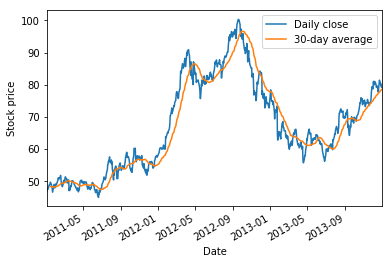

In [126]:
df['Close'].plot(label='Daily close')
df['Close'].rolling(window=30, min_periods=10).mean().plot(label='30-day average')
ylabel('Stock price')
legend(loc='best')
show()

In [127]:
closes = df['Close']
daily_return_ratio = closes / closes.shift(1)
daily_return_ratio[:10]

Date
2011-01-03         NaN
2011-01-04    1.005310
2011-01-05    1.008029
2011-01-06    0.999371
2011-01-07    1.007131
2011-01-10    1.018742
2011-01-11    0.997751
2011-01-12    1.007990
2011-01-13    1.003659
2011-01-14    1.008100
Name: Close, dtype: float64

#### Trading Simulator

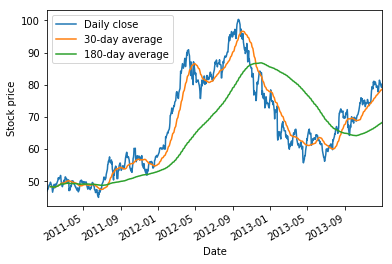

In [128]:
mavg_30 = closes.rolling(window=30, min_periods=10).mean()
mavg_180 = closes.rolling(window=180, min_periods=10).mean()

closes.plot(label='Daily close')
mavg_30.plot(label='30-day average')
mavg_180.plot(label='180-day average')
ylabel('Stock price')
legend(loc='best')
figsize(8,6)

In [129]:
mavg_30_is_greater = (mavg_30 > mavg_180)

hold_days = mavg_30_is_greater.shift(1)
hold_days['2011-02-08':'2011-02-22']

Date
2011-02-08    False
2011-02-09    False
2011-02-10    False
2011-02-11    False
2011-02-14    False
2011-02-15    False
2011-02-16     True
2011-02-17     True
2011-02-18     True
2011-02-22     True
Name: Close, dtype: object

In [130]:
hold_days = hold_days.fillna(False)  # we don't hold shares on the first day
hold_days[0:3]

Date
2011-01-03    False
2011-01-04    False
2011-01-05    False
Name: Close, dtype: bool

[]

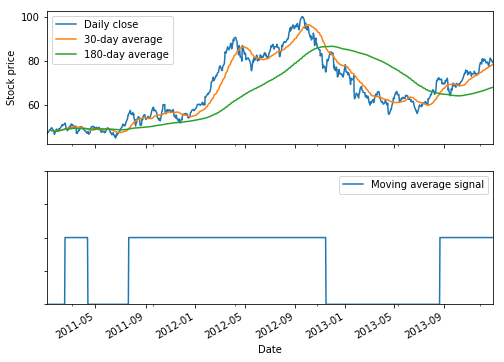

In [131]:
fig, (ax1, ax2) = subplots(nrows=2,
                           ncols=1,
                           sharex=True,
                           figsize=(8, 6))

closes.plot(ax=ax1, label='Daily close')
mavg_30.plot(ax=ax1, label='30-day average')
mavg_180.plot(ax=ax1, label='180-day average')
ax1.legend(loc='best')
ax1.set_ylabel('Stock price')

hold_days.plot(ax=ax2, ylim=[0,2], label='Moving average signal')
ax2.legend(loc='best')
ax2.yaxis.set_ticklabels([])

In [132]:
s = daily_return_ratio[hold_days]
print s.prod()

1.40002754483


In [133]:
print daily_return_ratio.prod()

1.70242141037


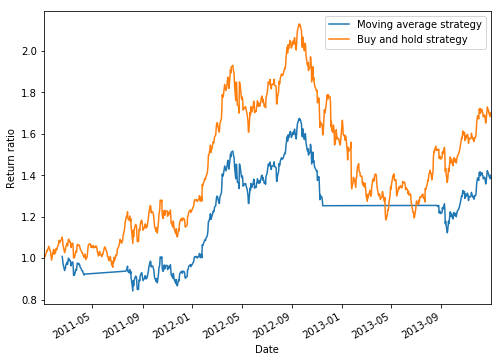

In [134]:
s.cumprod().plot(label='Moving average strategy')
daily_return_ratio.cumprod().plot(label='Buy and hold strategy')
ylabel('Return ratio')
legend(loc='best')
figsize(12,8)

## Statistics

In [135]:
census = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/census_population.csv')
census[:5]

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2014,POPEST18PLUS2014,PCNT_POPEST18PLUS
0,10,0,0,0,United States,318857056,245273438,76.9
1,40,3,6,1,Alabama,4849377,3741806,77.2
2,40,4,9,2,Alaska,736732,550189,74.7
3,40,4,8,4,Arizona,6731484,5109792,75.9
4,40,3,7,5,Arkansas,2966369,2259350,76.2


In [136]:
census = census.iloc[1:]  # Remove the United States from the data
state_census = census.set_index('NAME')
state_pop = state_census['POPESTIMATE2014']
state_pop[:5]

NAME
Alabama        4849377
Alaska          736732
Arizona        6731484
Arkansas       2966369
California    38802500
Name: POPESTIMATE2014, dtype: int64

In [137]:
heights = pd.read_csv('/Users/meganchen/Desktop/MIS_381/dataset/Galton-Heights.csv', index_col=0)
parents = heights['parent']
heights[:5]

,parent,child
1,70.5,61.7
2,68.5,61.7
3,65.5,61.7
4,64.5,61.7
5,64.0,61.7


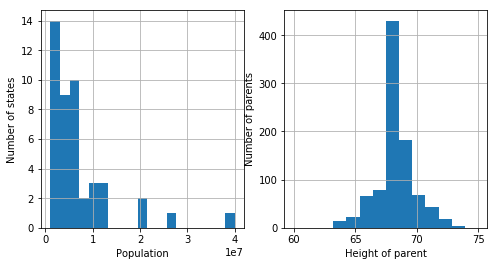

In [138]:
fig, (ax1, ax2) = subplots(nrows=1,
                           ncols=2,
                           figsize=(8, 4))

state_pop.hist(ax=ax1, bins=np.linspace(1e6, 40e6, 20))
ax1.set_xlabel('Population')
ax1.set_ylabel('Number of states')

parents.hist(ax=ax2, bins=np.linspace(60, 75, 15))
ax2.set_xlabel('Height of parent')
ax2.set_ylabel('Number of parents')

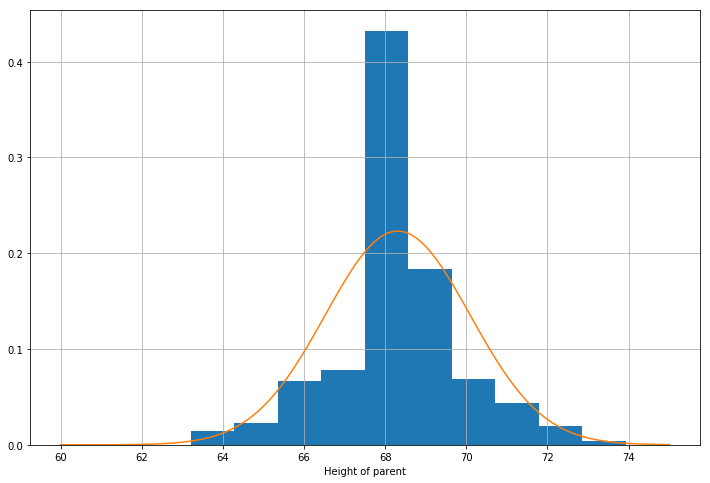

In [139]:
parents.hist(bins=np.linspace(60, 75, 15), normed=True) #normalize histogram
xlabel('Height of parent')

# And a bell curve with exactly the same mean and standard deviation.
x = np.linspace(60, 75, 100)
plot(x, mlab.normpdf(x, parents.mean(), parents.std()))

In [140]:
mean = parents.mean()
sd = parents.std()

mask_1_standard_dev = ((parents >= mean - sd) & (parents <= mean + sd))

print 'Fraction of parents heights within 1 standard deviation of the mean =',
print len(parents[mask_1_standard_dev]) * 1.0 / len(parents)


Fraction of parents heights within 1 standard deviation of the mean = 0.660560344828


In [141]:
mask_2_standard_dev = ((parents >= mean - 2 * sd) & (parents <= mean + 2 * sd))

print 'Fraction of parents heights within 2 standard deviation of the mean =',
print len(parents[mask_2_standard_dev]) * 1.0 / len(parents)

Fraction of parents heights within 2 standard deviation of the mean = 0.935344827586


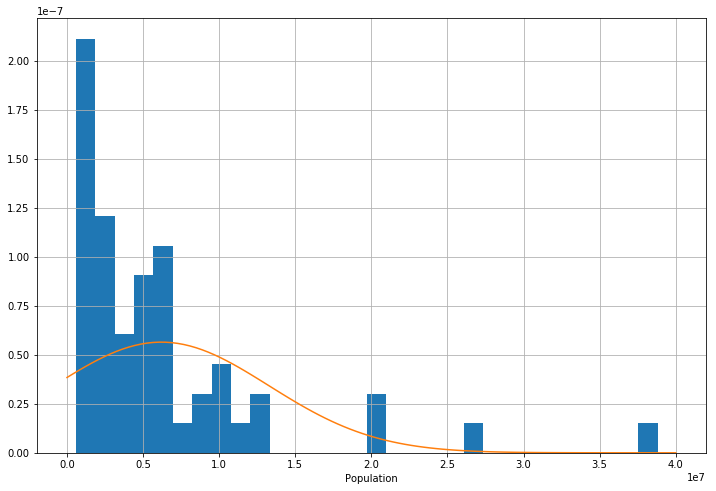

In [142]:
state_pop.hist(bins=30, normed=True)
xlabel('Population')

# And a bell curve with exactly the same mean and standard deviation.
mean = state_pop.mean()
sd = state_pop.std()
x = np.linspace(0, 4e7, 100)
plot(x, mlab.normpdf(x, mean, sd))


In [143]:
mask_1_standard_dev = ((state_pop >= mean - sd) & (state_pop <= mean + sd))
mask_2_standard_dev = ((state_pop >= mean - 2 * sd) & (state_pop <= mean + 2 * sd))

print 'Fraction of state populations within 1 standard deviation of the mean =',
print len(state_pop[mask_1_standard_dev]) * 1.0 / len(state_pop)
print 'Fraction of state populations within 2 standard deviation of the mean =',
print len(state_pop[mask_2_standard_dev]) * 1.0 / len(state_pop)

Fraction of state populations within 1 standard deviation of the mean = 0.923076923077
Fraction of state populations within 2 standard deviation of the mean = 0.961538461538


In [144]:
most_populous_states = state_pop.sort_values(ascending=False)
(most_populous_states[0] - mean ) / sd

4.6154358817193213

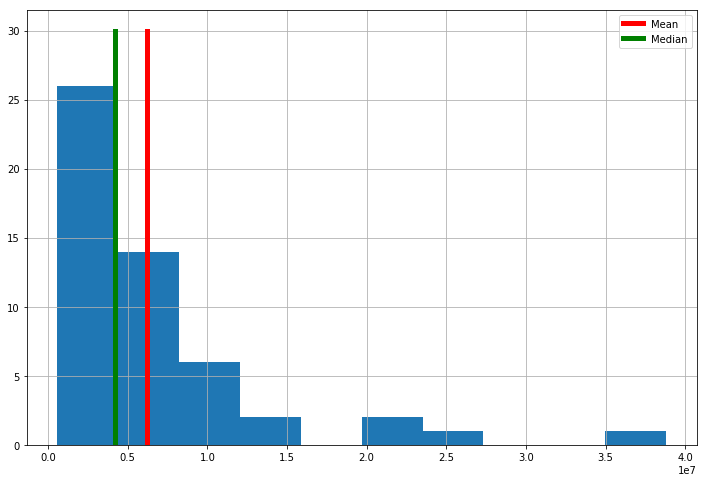

In [145]:
mean = state_pop.mean()
median = state_pop.median()

state_pop.hist(bins=10)                                                     # Histogram
plot([mean, mean], [0, 30], color='red', linewidth=5, label='Mean')         # Mean
plot([median, median], [0, 30], color='green', linewidth=5, label='Median') # Median
legend(loc='best')

#### Quantiless

In [146]:
print '25-percentile =', state_pop.quantile(0.25)
print 'Median = 50-percentile =', state_pop.quantile(0.5)
print '75-percentile population =', state_pop.quantile(0.75)
print '90-percentile =', state_pop.quantile(0.9)

25-percentile = 1796360.5
Median = 50-percentile = 4191848.0
75-percentile population = 6824438.5
90-percentile = 12667904.4


In [164]:
out = pd.qcut(state_pop, 10)
out, bins = pd.qcut(state_pop, 10, retbins=True)
bins

array([   584153. ,    861418.9,   1347983.4,   2311630.1,   3039297.8,
         4191848. ,   5416650.2,   6582604.1,   8815797.8,  12667904.4,
        38802500. ])

In [148]:
state_pop.describe()

count    5.200000e+01
mean     6.200105e+06
std      7.063774e+06
min      5.841530e+05
25%      1.796360e+06
50%      4.191848e+06
75%      6.824438e+06
max      3.880250e+07
Name: POPESTIMATE2014, dtype: float64

In [149]:
heights.describe()

,parent,child
count,928.000000,928.000000
mean,68.308190,68.088470
std,1.787333,2.517941
min,64.000000,61.700000
25%,67.500000,66.200000
50%,68.500000,68.200000
75%,69.500000,70.200000
max,73.000000,73.700000


In [150]:
census['REGION NAME'] = census['REGION'].replace({'1':'Northwest', '2':'Midwest', '3':'South', '4':'West'})
census[['POPESTIMATE2014', 'POPEST18PLUS2014', 'REGION NAME']][:5]

,POPESTIMATE2014,POPEST18PLUS2014,REGION NAME
1,4849377,3741806,South
2,736732,550189,West
3,6731484,5109792,West
4,2966369,2259350,South
5,38802500,29649348,West


In [151]:
census_pop = census[['POPESTIMATE2014', 'POPEST18PLUS2014', 'REGION NAME']]
census_pop_statistics = census_pop.groupby('REGION NAME').describe()
census_pop_statistics

POPEST18PLUS2014                                         \
                       count          mean           std        min   
REGION NAME                                                           
Midwest                 12.0  4.336984e+06  3.145883e+06   570955.0   
Northwest                9.0  4.909333e+06  5.165357e+06   504976.0   
South                   17.0  5.394036e+06  5.177648e+06   543588.0   
West                    13.0  4.411309e+06  7.766443e+06   445830.0   
X                        1.0  2.775645e+06           NaN  2775645.0   

                                                           POPESTIMATE2014  \
                    25%        50%         75%         max           count   
REGION NAME                                                                  
Midwest      1989739.75  4316361.0  5682717.75   9892106.0            12.0   
Northwest    1059672.00  2821247.0  6926094.00  15517321.0             9.0   
South        2262810.00  3741806.0  6457174.00  19841344.0            17.0   
West         1111117.00  2038787.0  4109494.00  29649348.0            13.0   
X            2775645.00  2775645.0  2775645.00   2775645.0             1.0   

                                                                          \
                     mean           std        min        25%        50%   
REGION NAME                                                                
Midwest      5.645426e+06  4.069933e+06   739482.0  2648391.5  5607368.5   
Northwest    6.239148e+06  6.580716e+06   626562.0  1326813.0  3596677.0   
South        7.045408e+06  6.859573e+06   658893.0  2994079.0  4832482.0   
West         5.783668e+06  1.015746e+07   584153.0  1419561.0  2839099.0   
X            3.548397e+06           NaN  3548397.0  3548397.0  3548397.0   

                                    
                   75%         max  
REGION NAME                         
Midwest      7425110.5  12880580.0  
Northwest    8938175.0  19746227.0  
South        8326289.0  26956958.0  
West         5355866.0  38802500.0  
X            3548397.0   3548397.0

In [152]:
census_pop_stats_stacked = census_pop_statistics.stack()
census_pop_stats_stacked.loc['Midwest']

,POPEST18PLUS2014,POPESTIMATE2014
count,1.200000e+01,1.200000e+01
mean,4.336984e+06,5.645426e+06
std,3.145883e+06,4.069933e+06
min,5.709550e+05,7.394820e+05
25%,1.989740e+06,2.648392e+06
50%,4.316361e+06,5.607368e+06
75%,5.682718e+06,7.425110e+06
max,9.892106e+06,1.288058e+07


#### Correlation

In [153]:
heights['parent'].corr(heights['child'])

0.45876236829282185

In [154]:

heights['parent'].corr(heights['child'], method='spearman')



0.4251344659429212

In [155]:
start_date = datetime(2011, 1, 1) # January 1, 2011
end_date = datetime(2014, 1, 1)   # January 1, 2014

aapl = web.DataReader('AAPL', 'google', start_date, end_date)
spy = web.DataReader('SPY', 'google', start_date, end_date)

In [156]:
stocks = DataFrame({'AAPL':aapl['Close'], 'SPY':spy['Close']})

In [157]:
print "Correlation of AAPL and S&P 500:"
print "\t Standard (Pearson):", stocks['AAPL'].corr(stocks['SPY'])
print "\t Spearman:", stocks['AAPL'].corr(stocks['SPY'], method='spearman')


Correlation of AAPL and S&P 500:
	 Standard (Pearson): 0.31449500573
	 Spearman: 0.491954060172


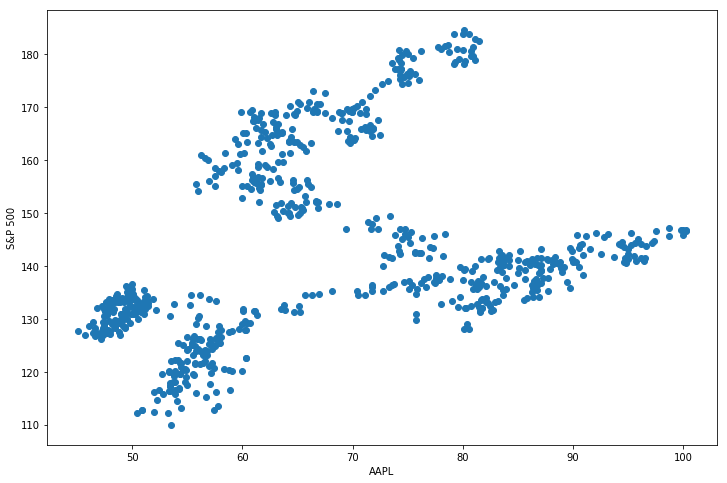

In [158]:
plot(stocks['AAPL'], stocks['SPY'], marker='o', linestyle='None')
xlabel('AAPL')
ylabel('S&P 500')

In [159]:
aapl_spy_over_time = stocks['AAPL'].rolling(window=30, min_periods=10).corr(stocks['SPY'])
aapl_spy_over_time[10:20]

Date
2011-01-18    0.670922
2011-01-19    0.665229
2011-01-20    0.618038
2011-01-21    0.464789
2011-01-24    0.433916
2011-01-25    0.455623
2011-01-26    0.501056
2011-01-27    0.527775
2011-01-28    0.533050
2011-01-31    0.533730
dtype: float64

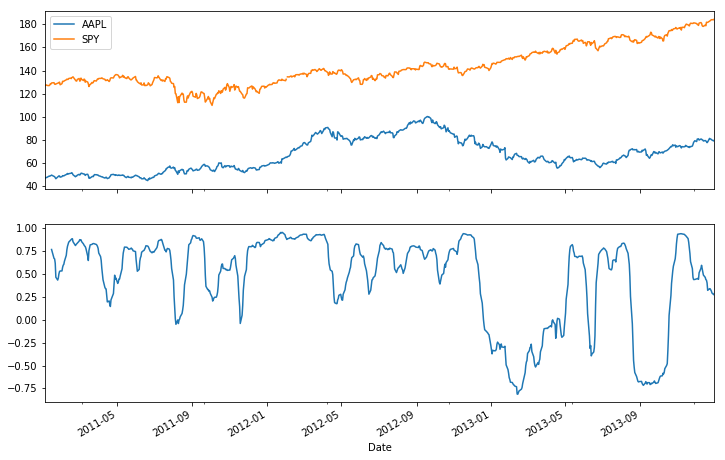

In [160]:
fig, (ax1, ax2) = subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))

# On the first plot, show AAPL and SPY together
stocks.plot(ax=ax1, secondary_y=['S&P 500'])

# On the second plot, show the rolling correlation over time
aapl_spy_over_time.plot(ax=ax2)